<a href="https://colab.research.google.com/github/Jahan2021/UCS-Classification/blob/main/UCS_classic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the colab drive library to get the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from google.colab import drive
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/ucsdata.csv", encoding='latin-1')


In [5]:
dataset.head()

,label,text
0,1,user accesses the main inventory screen.
1,1,system displays the add department button.
2,1,user navigates to a department or category see...
3,1,system displays the add category buttons.
4,1,user clicks the desired add category button.


In [ ]:
#dataset = dataset.rename(columns = {'Category':'label','Message':'message'})

In [3]:
dataset.groupby('label').describe()

text                                                        
      count unique                                         top freq
label                                                              
0       678    652  components consist of household devices e.    2
1       515    450                            end of use case.    6

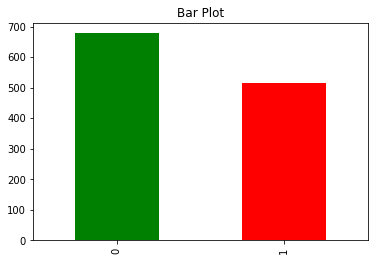

In [4]:
count_Class=pd.value_counts(dataset["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show();

In [5]:
df=dataset
df=df.drop_duplicates(keep='last', ignore_index=True)

In [7]:
df_not_usecase = df[df['label']==0]
df_not_usecase.shape
df_usecase = df[df['label']==1]
df_usecase.shape
#down sample the dataset to make it balanced
df_not_usecase_downsampled = df_not_usecase.sample(df_usecase.shape[0])
df_not_usecase_downsampled.shape
df_balanced = pd.concat([df_not_usecase_downsampled, df_usecase])
df_balanced.shape
df_balanced['label'].value_counts()

1    450
0    450
Name: label, dtype: int64

In [21]:
dataset=df_balanced
f = feature_extraction.text.CountVectorizer()
#f = feature_extraction.text.TfidfVectorizer()
X = f.fit_transform(dataset["text"])
np.shape(X)

(900, 1895)

In [ ]:
dataset["text"]

**Implementing Naive Bayes**

In [22]:
# Classifying spam and not spam msgs as 1 and 0

#dataset["label"]=dataset["label"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, dataset['label'], test_size=0.70, random_state=42)

In [23]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [24]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)




,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.992593,0.882540,0.950658,0.830460
1,0.11001,0.992593,0.887302,0.957237,0.833811
2,0.22001,0.981481,0.887302,0.960526,0.831909
3,0.33001,0.981481,0.890476,0.967105,0.832861
4,0.44001,0.981481,0.884127,0.960526,0.827195
5,0.55001,0.981481,0.882540,0.960526,0.824859
6,0.66001,0.981481,0.880952,0.957237,0.824363
7,0.77001,0.981481,0.882540,0.960526,0.824859
8,0.88001,0.981481,0.882540,0.960526,0.824859
9,0.99001,0.977778,0.882540,0.963816,0.823034


In [25]:
mat = np.matrix(np.c_[ score_train, score_test])
mat=pd.DataFrame(data = mat, columns = ['Train Accuracy', 'Test Accuracy'])
mat.reindex(index=mat.index[::-1])
mat.head()

,Train Accuracy,Test Accuracy
0,0.992593,0.882540
1,0.992593,0.887302
2,0.981481,0.887302
3,0.981481,0.890476
4,0.981481,0.884127


In [27]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             0.110010
Train Accuracy    0.992593
Test Accuracy     0.887302
Test Recall       0.957237
Test Precision    0.833811
Name: 1, dtype: float64

In [29]:
#nb = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
#nb_model = rf.fit(X_train,y_train)
bayes = naive_bayes.MultinomialNB(alpha=alpha)
nb_model=bayes.fit(X_train, y_train)

In [30]:
y_pred1=bayes.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test,y_pred1)) 
print(classification_report(y_test,y_pred1)) 
print(accuracy_score(y_test,y_pred1))

[[196 130]
 [  6 298]]
              precision    recall  f1-score   support

           0       0.97      0.60      0.74       326
           1       0.70      0.98      0.81       304

    accuracy                           0.78       630
   macro avg       0.83      0.79      0.78       630
weighted avg       0.84      0.78      0.78       630

0.7841269841269841


In [ ]:
#AUC curve


**Random Forest Method**

In [100]:
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [101]:
y_pred2=rf_model.predict(X_test)
precision,recall,fscore,support =score(y_test,y_pred2,pos_label=1, average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred2==y_test).sum()/len(y_test),3)))

Precision : 0.857 / Recall : 0.888 / fscore : 0.872 / Accuracy: 0.875


In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test,y_pred2)) 
print(classification_report(y_test,y_pred2)) 
print(accuracy_score(y_test,y_pred2))

[[281  45]
 [ 34 270]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       326
           1       0.86      0.89      0.87       304

    accuracy                           0.87       630
   macro avg       0.87      0.88      0.87       630
weighted avg       0.88      0.87      0.87       630

0.8746031746031746


In [103]:
from sklearn import metrics
targets=y_test
fpr1, tpr1, thresh1 = metrics.roc_curve(targets, y_pred1, pos_label=1)
fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, y_pred2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(targets))]
p_fpr, p_tpr, _ = metrics.roc_curve(targets, random_probs, pos_label=1)
auc_score1 = metrics.roc_auc_score(targets, y_pred1)
auc_score2 = metrics.roc_auc_score(targets, y_pred2)

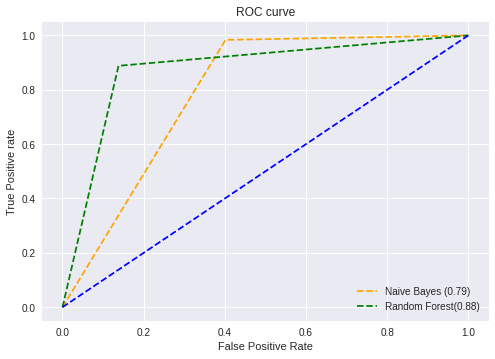

In [104]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes ('+str(auc_score1.round(2))+')')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest('+str(auc_score2.round(2))+')')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='lower right')

plt.savefig('ROC_CML.png',dpi=300)
plt.show();

In [105]:
#write functions to detect if the message is spam or not
def find(x):
    if x == 1:
        print ("Message is UCS")
    else:
        print ("Message is NOT UCS")

In [106]:
test3 = ["User selects a transformation language program file to parse. ",
"The HATS-GUI compares the time stamps on the lexical specification and grammar files to the time.",
          "agentMom shall 1-2 support the ability to send unicast message."]

In [119]:
newtext = ['User selects a transformation language program file to parse.']
f = feature_extraction.text.CountVectorizer()
f.fit(dataset["text"])
x = f.transform(test3)



In [72]:
x.shape

(1, 1705)

In [120]:
y = rf_model.predict_proba(x)
#find(x) 
print(y)
print(rf_model.predict(x))

[[0.09 0.91]
 [0.41 0.59]
 [0.72 0.28]]
[1 1 0]


In [121]:
y=bayes.predict_proba(x)
print(y)
print(bayes.predict(x))

[[0.06715065 0.93284935]
 [0.15578585 0.84421415]
 [0.35549735 0.64450265]]
[1 1 1]


In [118]:
T=["Store assistant checks status of the tape to be returned by customer. ","PDF Split and Merge was created prior to this document, so all requirements stated here are already satisfied.","Cashier enters item identifier.",
"System updates the sale line item."]
x=f.transform(T)
y=bayes.predict(x)
y

array([0, 0, 1, 1])

In [112]:
y=rf_model.predict(x)
y

array([0, 0, 1, 1])